### Code to make gravity change plot - Lushan Earthquake

In [76]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import matplotlib.patches as patches

In [77]:
# Topogrphy data
ds = xr.open_dataset("ETOPO_2022_v1_60s_N90W180_bed.nc")
ds = ds.sel(lon=slice(100, 105), lat=slice(26, 32))

# Extract latitude and longitude coordinates
latitude = ds.lat.values
longitude = ds.lon.values

# Extract z values
z_values = ds.z.values

# add topography
y = ds.lat.values
x = ds.lon.values
z = ds.z.values

In [136]:
# Gravity change data

xls = pd.ExcelFile("Figure 4. The cumulative dynamic gravity changes forwarded from the field source apparent density..xlsx")
sheet_names = xls.sheet_names
dfs = {}

# Iterate through each sheet and read it into a data frame
for sheet_name in sheet_names:
    df = pd.read_excel("Figure 4. The cumulative dynamic gravity changes forwarded from the field source apparent density..xlsx", sheet_name=sheet_name)
    dfs[sheet_name] = df

dfs_list = list(dfs.values())

# Merge the data frames based on latitude and longitude
merged_df = dfs_list[0]
for df in dfs_list[1:]:
    merged_df = pd.merge(merged_df, df, on=['latitude', 'longitude'], how='inner')

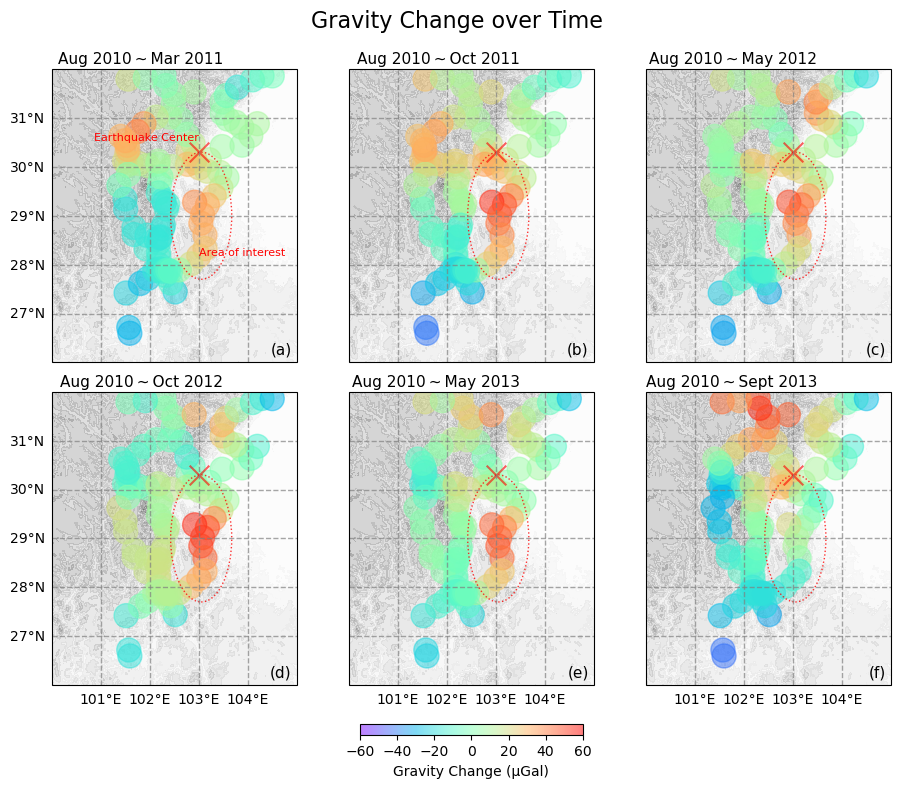

In [135]:
# Make Figute

proj = ccrs.PlateCarree()
fig, axs = plt.subplots(2, 3, figsize=(11.5, 10), subplot_kw={'projection': proj})

plt.subplots_adjust(wspace=0, hspace=0.1)

# Set title
fig.suptitle('Gravity Change over Time', fontsize=16, y=.94)

# Set extent boundaries
extent = [100, 105, 26, 32]

# Set axes labels
labels = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)"]
dates = ["Aug 2010 ~ Mar 2011", "Aug 2010 ~ Oct 2011", "Aug 2010 ~ May 2012", "Aug 2010 ~ Oct 2012", "Aug 2010 ~ May 2013", "Aug 2010 ~ Sept 2013"]

# Loop through each subplot and customize
for i, ax in enumerate(axs.flat):

    # Set boundaries, topography, gridlines
    ax.set_extent(extent)
    ax.contourf(x, y, z, cmap='Greys', alpha=0.3, transform=proj)
    grid = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.7, linestyle='--')

    # Add axes labels
    if i % 3 != 0:
        grid.left_labels = False
    if i < 3:
        grid.bottom_labels = False
    grid.right_labels = False
    grid.top_labels = False

    # Add gravity change points
    scatter = ax.scatter(merged_df['longitude'], merged_df['latitude'], c=merged_df.iloc[:, i+2], cmap='rainbow', transform=proj, s=300, alpha=0.5, vmin=-60, vmax=60)

    # Add labels (red)
    ax.scatter(103.0, 30.3, color='r', marker='x', s=200, alpha=.6)
    ax.text(0.98, 0.02, labels[i], transform=ax.transAxes, ha='right', va='bottom', fontsize=11)
    ax.text(0.7, 1.01, dates[i], transform=ax.transAxes, ha='right', va='bottom', fontsize=11)
    oval = patches.Ellipse(xy=(103.05, 29), width=1.25, height=2.6, linestyle='dotted', edgecolor='r', facecolor='none', alpha=.8)
    ax.add_patch(oval)


# Add labels to ax 1
axs[0,0].text(100.85, 30.55, "Earthquake Center", fontsize=8, c="r")
axs[0,0].text(103, 28.2, "Area of interest", fontsize=8, c="r")

# Colorbar
cbar = plt.colorbar(scatter, ax=axs.ravel().tolist(), orientation='horizontal', pad=0.05, label='Gravity Change (μGal)', shrink=0.25, ticks=np.arange(-60, 61, 20))

plt.show()